In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,7 #grandezza grafico fissata a priori

import seaborn as sns 
sns.set(style="whitegrid")

## Arrangiamento Calendario

In [2]:
fname = "Calendario_Campionato---A-buon-rendere.xlsx"
directory = "C://Users//udazz//Dropbox//Documenti//fanta//pyanalysis_2021//input//"
df = pd.read_excel(directory+fname, skiprows=2)
df = df.drop(['Unnamed: 5'], axis=1)
ultima_giornata = df.iloc[86:90] #poi qua dovrai fare l'append
df = df.dropna()
df = df.reset_index(drop=True)

In [3]:
start = 0
data = pd.DataFrame()
while start < 69: 
    blocco = df.iloc[start:start+4]
    start = start+4
    blocco1 = blocco[['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3', 'Unnamed: 2', 'Unnamed: 4']]
    blocco2 = blocco[['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 8', 'Unnamed: 10']]
    ren_col2 = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 3', 'Unnamed: 2', 'Unnamed: 4']
    blocco2.columns = ren_col2
    blocco1 = blocco1.append(blocco2)
    data = data.append(blocco1)
data = data.append(ultima_giornata)
data = data.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)

In [4]:
data['goal1'] = data['Unnamed: 4'].str[:1] 
data['goal2'] = data['Unnamed: 4'].str[-1:]
data = data[['Unnamed: 0', 'Unnamed: 1', 'goal1', 'Unnamed: 3', 'Unnamed: 2', 'goal2']]

In [5]:
start = 0
df = pd.DataFrame()
while start < 140: 
    blocco = data.iloc[start:start+4]
    start = start + 4
    blocco1 = blocco[['Unnamed: 0', 'Unnamed: 1', 'goal1']]
    blocco2 = blocco[['Unnamed: 3', 'Unnamed: 2', 'goal2']]
    ren_col2 = ['Unnamed: 0', 'Unnamed: 1', 'goal1']
    blocco2.columns = ren_col2
    blocco1 = blocco1.append(blocco2)
    df = df.append(blocco1)

In [6]:
df = df.reset_index(drop=True)
df.rename(columns = {"Unnamed: 0": "squadra", "Unnamed: 1": "fantapunti", 'goal1': 'goal'}, inplace=True)
df['giornata'] = df.index
df.sort_values(by=["squadra", "giornata"], inplace=True)
df['fantapunti'] = df['fantapunti'].replace(0, np.nan)

In [7]:
giornate = []
for i in range(1,36):
    i = str(i)
    giornate.append(i)
giornate = giornate * 8
df['giornata'] = giornate

In [8]:
df['giornata'] = giornate
df = df.dropna()
df['goal'] = df['goal'].astype('int')
df = df.reset_index(drop=True)
df

,squadra,fantapunti,goal,giornata
0,Barriera-team,70.0,2,1
1,Barriera-team,75.0,3,2
2,Barriera-team,70.5,2,3
3,CACCOLA F.C.,79.0,4,1
4,CACCOLA F.C.,72.0,2,2
5,CACCOLA F.C.,77.5,3,3
6,Capitan Martella,83.0,5,1
7,Capitan Martella,74.5,3,2
8,Capitan Martella,62.5,0,3
9,Civediamoamaggio,70.5,2,1


## Grafici

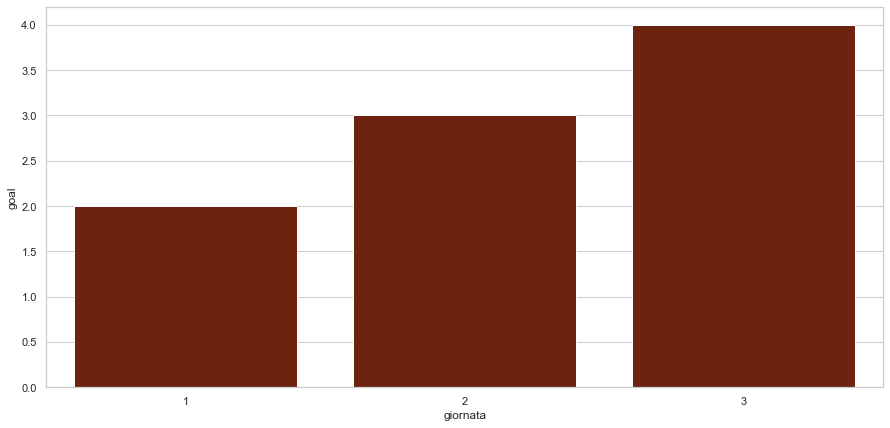

In [9]:
players = list(set(df.squadra))
players = sorted(players)
plt.rcParams['figure.figsize'] = 15,7
#performance di un singolo giocatore
filtro_player = df.squadra == players[3]
df_player = df[filtro_player]
sns.barplot(df_player.giornata, df_player.goal, color='#7B1B02');

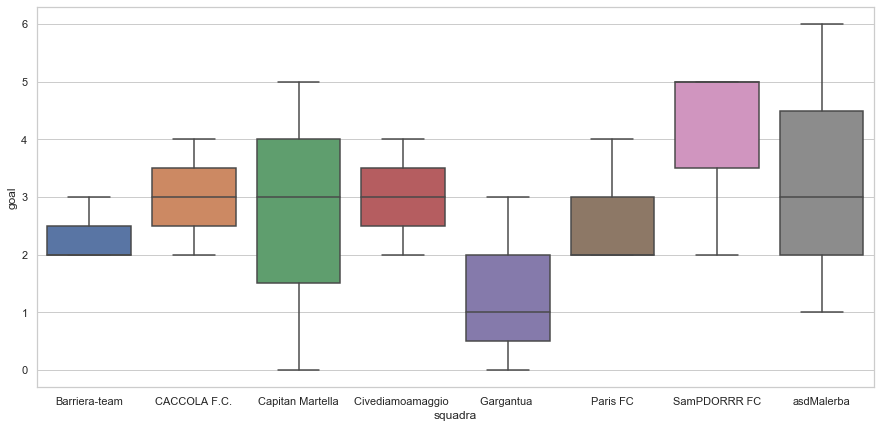

In [10]:
sns.boxplot(df.squadra, df.goal);

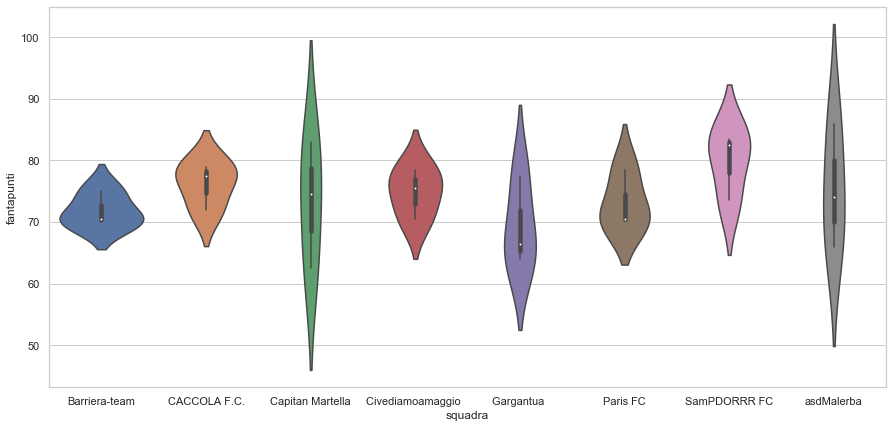

In [11]:
sns.violinplot(df.squadra, df.fantapunti);

## Analysis

In [12]:
data = df.pivot(index='squadra', columns='giornata', values='goal') #reshape the dataset
#rinominare le colonne
lenght, width = data.shape 
nomi_colonne = []
for i in range(1,width+1):
    nomi_colonne.append('goal_fatti'+ str(i))
data.columns = nomi_colonne

data.sort_values(by="squadra", inplace=True) #per semplicità voglio ordinare le squadre in ordine alfabetico

In [13]:
#ora che ho il dataset pronto, posso passare all'analisi
from itertools import permutations, product #permutations non serve ad un cazzo

import seaborn as sns #seaborn
plt.rcParams['figure.figsize'] = 15,5 #grandezza grafico

In [14]:
lista_confronti=[]
for i in data.columns: #per ogni colonna (ovvero per ogni giornata ogni giornata)...
    i = list(product(data[i], data[i])) #... accoppiami tutti i numeri, verranno quindi 64 (8*8) coppie
    lista_confronti.append(i)
lista_confronti

[[(2, 2),
  (2, 4),
  (2, 5),
  (2, 2),
  (2, 0),
  (2, 2),
  (2, 5),
  (2, 3),
  (4, 2),
  (4, 4),
  (4, 5),
  (4, 2),
  (4, 0),
  (4, 2),
  (4, 5),
  (4, 3),
  (5, 2),
  (5, 4),
  (5, 5),
  (5, 2),
  (5, 0),
  (5, 2),
  (5, 5),
  (5, 3),
  (2, 2),
  (2, 4),
  (2, 5),
  (2, 2),
  (2, 0),
  (2, 2),
  (2, 5),
  (2, 3),
  (0, 2),
  (0, 4),
  (0, 5),
  (0, 2),
  (0, 0),
  (0, 2),
  (0, 5),
  (0, 3),
  (2, 2),
  (2, 4),
  (2, 5),
  (2, 2),
  (2, 0),
  (2, 2),
  (2, 5),
  (2, 3),
  (5, 2),
  (5, 4),
  (5, 5),
  (5, 2),
  (5, 0),
  (5, 2),
  (5, 5),
  (5, 3),
  (3, 2),
  (3, 4),
  (3, 5),
  (3, 2),
  (3, 0),
  (3, 2),
  (3, 5),
  (3, 3)],
 [(3, 3),
  (3, 2),
  (3, 3),
  (3, 3),
  (3, 1),
  (3, 4),
  (3, 5),
  (3, 6),
  (2, 3),
  (2, 2),
  (2, 3),
  (2, 3),
  (2, 1),
  (2, 4),
  (2, 5),
  (2, 6),
  (3, 3),
  (3, 2),
  (3, 3),
  (3, 3),
  (3, 1),
  (3, 4),
  (3, 5),
  (3, 6),
  (3, 3),
  (3, 2),
  (3, 3),
  (3, 3),
  (3, 1),
  (3, 4),
  (3, 5),
  (3, 6),
  (1, 3),
  (1, 2),
  (1, 3),
  (1, 3),

In [15]:
giornate = len(lista_confronti) #quante gironate sono state giocate
matrici88_giornate = [] 
for i in range(giornate): #cioè per ogni giornata
    for elementi in lista_confronti[i]: 
        elementi = elementi[0] - elementi[1] #genera la differenza di tutte le coppie generate in lista_confronti (sopra)
        if elementi > 0:    
            elementi = 3 #vittoria
        elif elementi < 0:  
            elementi = 0 #sconfitta
        else:               
            elementi = 1 #pareggio
        matrici88_giornate.append(elementi)

#organizza la lista che hai appena creato nel seguente modo:
    #ci sono tante matrici 8*8 quante sono le giornate
    #ogni matrice è una giornata
    #sulle righe di ogni matrice abbiamo la performance degli otto giocatori
matrici88_giornate = np.array(matrici88_giornate).reshape((giornate, 8, 8))

In [16]:
#creo questa matrice per togliere il punto che ad ogni giornata veniva precendentemente assegnato di default 
    #(questo accadeva perché tutti giocavano contro se stessi)
validation_matrix = np.ones([giornate,8,8])
d3, row, col = validation_matrix.shape
for k in range(d3):
    for i in range(row):
        for j in range(col):
            if i == j: 
                validation_matrix[k,i,j] = 0

matrici88_giornate = matrici88_giornate * validation_matrix
matrici88_giornate

array([[[0., 0., 0., 1., 3., 1., 0., 0.],
        [3., 0., 0., 3., 3., 3., 0., 3.],
        [3., 3., 0., 3., 3., 3., 1., 3.],
        [1., 0., 0., 0., 3., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 3., 0., 0., 0.],
        [3., 3., 1., 3., 3., 3., 0., 3.],
        [3., 0., 0., 3., 3., 3., 0., 0.]],

       [[0., 3., 1., 1., 3., 0., 0., 0.],
        [0., 0., 0., 0., 3., 0., 0., 0.],
        [1., 3., 0., 1., 3., 0., 0., 0.],
        [1., 3., 1., 0., 3., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 3., 3., 3., 3., 0., 0., 0.],
        [3., 3., 3., 3., 3., 3., 0., 0.],
        [3., 3., 3., 3., 3., 3., 3., 0.]],

       [[0., 0., 3., 0., 0., 1., 1., 3.],
        [3., 0., 3., 0., 1., 3., 3., 3.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [3., 3., 3., 0., 3., 3., 3., 3.],
        [3., 1., 3., 0., 0., 3., 3., 3.],
        [1., 0., 3., 0., 0., 0., 1., 3.],
        [1., 0., 3., 0., 0., 1., 0., 3.],
        [0., 0., 3., 0., 0., 0

In [17]:
### PUNTI OGNI GIORNATA ###

#non ricordo come funziona la np.sum, con axis=2, funziona solo per 3D array, era nella lezione03_03 del corso LinkedIn
punti_giornata = matrici88_giornate.sum(axis=2)  
punti_giornata #ora ogni riga rappresenta una giornata, ogni colonna un giocatore, ma a me serve la trasposta

array([[ 5., 15., 19.,  5.,  0.,  5., 19., 12.],
       [ 8.,  3.,  8.,  8.,  0., 15., 18., 21.],
       [ 8., 16.,  0., 21., 16.,  8.,  8.,  3.]])

In [18]:
punti_giornata = punti_giornata.T #ora ogni matrice rappresenta la performance di ogni giocatore nelle giornate
punti_giornata = pd.DataFrame(punti_giornata) 
punti_giornata.set_index(data.index, inplace=True)
punti_giornata.columns = data.columns

In [19]:
#setto i nomi delle variabili, ora sono uguali ai nomi delle variabili del dataset originale
punti_giornata.columns = data.columns #ma voglio cambiare la parola 'goal' che non va bene
nuovi_nomi = []
for elementi in punti_giornata.columns:
    elementi = elementi.replace('goal','punti') #sostituisci la parola 'goal' con la parola 'punti'
    nuovi_nomi.append(elementi)
punti_giornata.columns = nuovi_nomi
punti_giornata = punti_giornata.astype(int) #trasformiamo i valori del dataframe in int
punti_giornata

,punti_fatti1,punti_fatti2,punti_fatti3
squadra,,,
Barriera-team,5,8,8
CACCOLA F.C.,15,3,16
Capitan Martella,19,8,0
Civediamoamaggio,5,8,21
Gargantua,0,0,16
Paris FC,5,15,8
SamPDORRR FC,19,18,8
asdMalerba,12,21,3


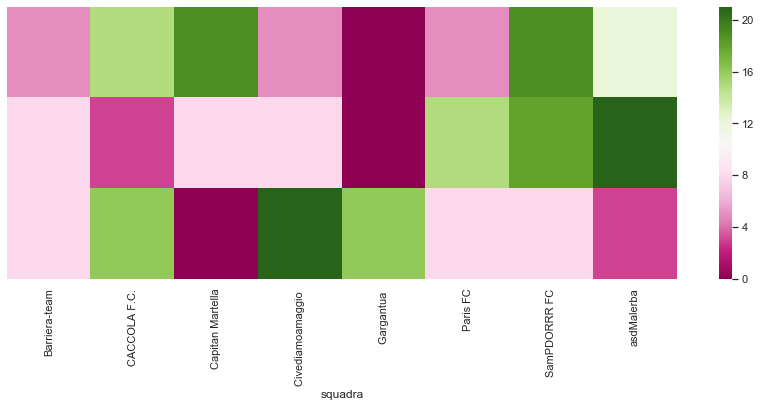

In [20]:
sns.heatmap(punti_giornata.T, xticklabels=punti_giornata.index, cmap="PiYG", yticklabels=False); 
    #at the bottom trovi le ultime giornate, in alto le prime 

## CLASSIFICA FINALE 

In [21]:
#non sono sicuro che devo necessariamente trasformare il dataframe in np.matrix/array per poter sommare orizzontalmente
    #(axis=0 somma verticale)
classifica_finale = np.asmatrix(punti_giornata).sum(axis=1)

In [22]:
data['classifica_finale'] = classifica_finale #aggiungo la classifica finale al dataset 
data.sort_values(["classifica_finale"], ascending=False, inplace=True) #ordinare dal più alto al più basso
classifica_finale = data['classifica_finale'] #per tenere solo la classifica (creo un altro dataset)
classifica_finale

squadra
SamPDORRR FC         45
asdMalerba           36
CACCOLA F.C.         34
Civediamoamaggio     34
Paris FC             28
Capitan Martella     27
Barriera-team        21
Gargantua            16
Name: classifica_finale, dtype: int32

In [23]:
(classifica_finale/7).round(1) #per fare 3 punti devi battere tutti gli altri 7

squadra
SamPDORRR FC         6.4
asdMalerba           5.1
CACCOLA F.C.         4.9
Civediamoamaggio     4.9
Paris FC             4.0
Capitan Martella     3.9
Barriera-team        3.0
Gargantua            2.3
Name: classifica_finale, dtype: float64

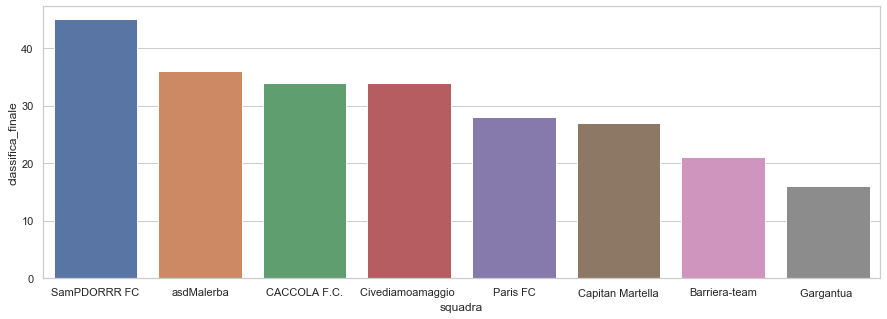

In [24]:
sns.barplot(data.index, data.classifica_finale);

## Scontri 1 contro 1 

In [41]:
print(players)

giocatore1 = players[-2]
giocatore2 = players[3]

['Barriera-team', 'CACCOLA F.C.', 'Capitan Martella', 'Civediamoamaggio ', 'Gargantua ', 'Paris FC', 'SamPDORRR FC', 'asdMalerba']


In [48]:
giornate = max(df.giornata)
data = df.copy()
data.drop(columns=['fantapunti'], inplace=True) 
data = data[(data.squadra == giocatore1) | (data.squadra == giocatore2)] #filter
data = data.pivot(index='giornata', columns='squadra', values='goal') #reshape
data['diff'] = data[giocatore1] - data[giocatore2] #non importa l'ordine alfabetico delle colonne, farà sempre giocat1-giocat2
data

squadra,Civediamoamaggio,SamPDORRR FC,diff
giornata,,,
1,2,5,3
2,3,5,2
3,4,2,-2


In [43]:
lenght, width = data.shape
matrix = np.matrix(data) #per pacioccarlo devo trasformarlo in numpy.array

In [44]:
punti_giocatore1 = []
for i in range(lenght):
    if matrix[i,2] > 0:
        i = 3
    elif matrix[i,2] < 0:
        i = 0
    else:
        i = 1
    punti_giocatore1.append(i)

print(punti_giocatore1)

[3, 3, 0]


In [45]:
punti_giocatore2 = []
for i in range(lenght):
    if matrix[i,2] < 0:
        i = 3
    elif matrix[i,2] > 0:
        i = 0
    else:
        i = 1
    punti_giocatore2.append(i)

print(punti_giocatore2)

[0, 0, 3]


In [46]:
print('punti', giocatore1+':', sum(punti_giocatore1))
print('punti', giocatore2+':', sum(punti_giocatore2))

punti SamPDORRR FC: 6
punti Civediamoamaggio : 3


In [47]:
#pure qui non importa l'ordine alfabetico: quello alto (sopra lo zero) sarà sempre il giocatore1
import plotly.express as px
fig = px.area(data, x=data.index, y='diff')
fig.update_layout(xaxis_title='Giornata',
                   yaxis_title='Differenza')
fig.show()